In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore,shapiro
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [9]:
df=pd.read_csv("StudentPerformanceFactors.csv")

In [10]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [11]:
df.shape

(6607, 20)

In [13]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [14]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [15]:
df.dropna(inplace=True)

In [17]:
df.duplicated().sum()

0

In [19]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
z_scores = np.abs(zscore(df[numeric_columns]))
threshold = 3
outliers = z_scores > threshold
outliers_count = outliers.sum(axis=0)
print(outliers_count)

Hours_Studied        22
Attendance            0
Sleep_Hours           0
Previous_Scores       0
Tutoring_Sessions    26
Physical_Activity     0
Exam_Score           52
dtype: int64


In [46]:
df_cleaned=df[~outliers.any(axis=1)]

In [47]:
df_cleaned

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [60]:
df_cleaned.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


In [49]:
df_cleaned.describe(include="object")

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6378,6378,6378,6378,6378,6378,6378,6378,6378,6378,6378,6378,6378
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3251,3204,3807,3237,5893,2582,3826,4434,2553,5710,3159,3801,3688


In [65]:
for col in df_cleaned.select_dtypes(include=["object"]).columns:
    print(df[col].value_counts())
    print('----------------------------')

Parental_Involvement
Medium    3251
High      1836
Low       1291
Name: count, dtype: int64
----------------------------
Access_to_Resources
Medium    3204
High      1900
Low       1274
Name: count, dtype: int64
----------------------------
Extracurricular_Activities
Yes    3807
No     2571
Name: count, dtype: int64
----------------------------
Motivation_Level
Medium    3237
Low       1864
High      1277
Name: count, dtype: int64
----------------------------
Internet_Access
Yes    5893
No      485
Name: count, dtype: int64
----------------------------
Family_Income
Low       2582
Medium    2566
High      1230
Name: count, dtype: int64
----------------------------
Teacher_Quality
Medium    3826
High      1905
Low        647
Name: count, dtype: int64
----------------------------
School_Type
Public     4434
Private    1944
Name: count, dtype: int64
----------------------------
Peer_Influence
Positive    2553
Neutral     2495
Negative    1330
Name: count, dtype: int64
--------------------

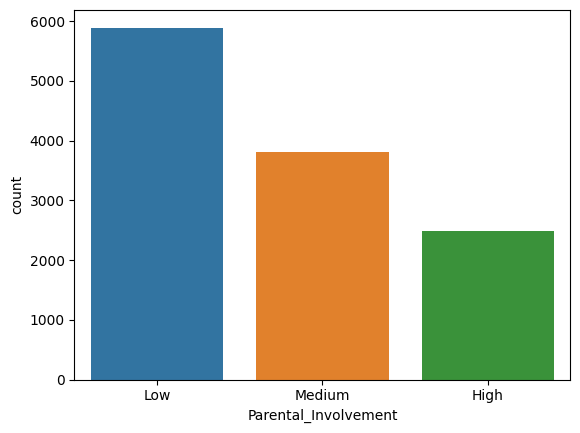

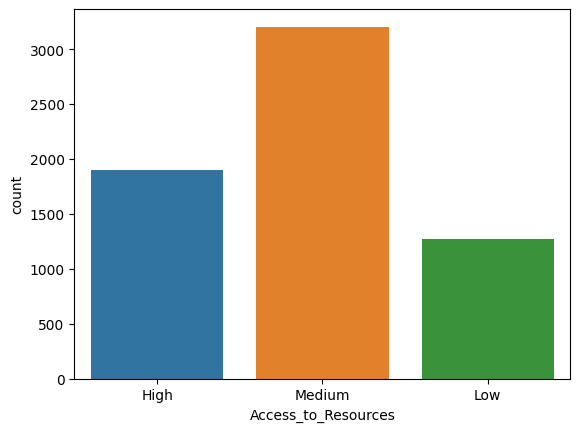

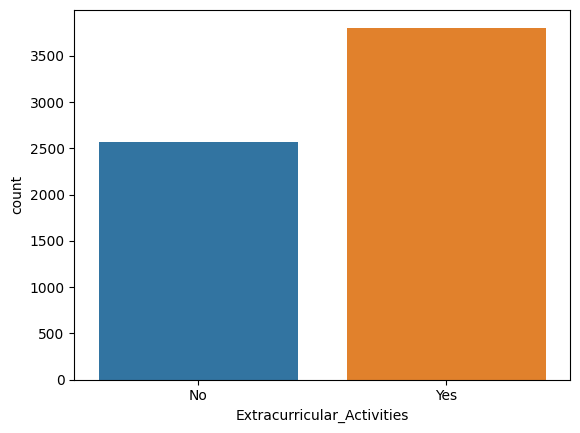

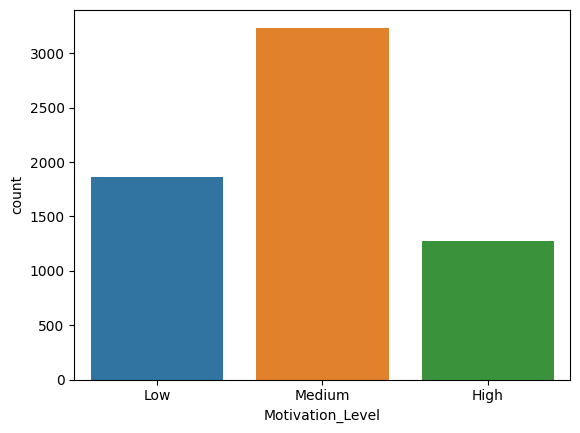

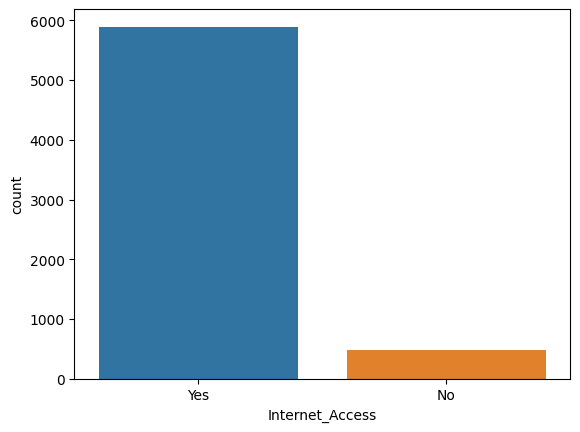

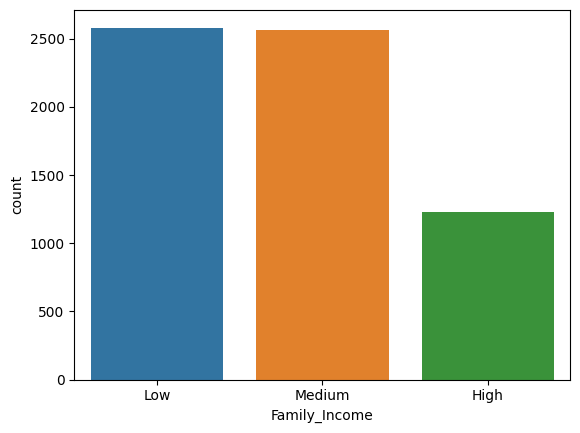

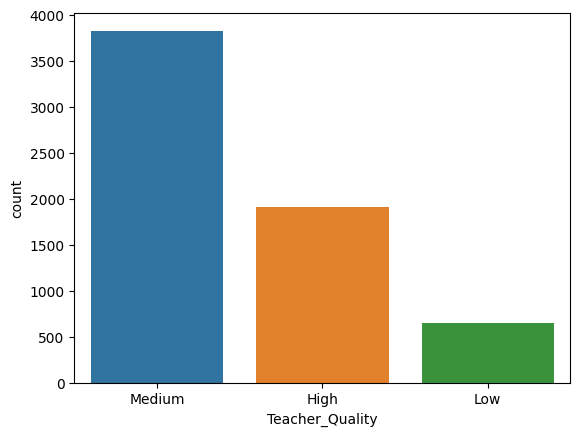

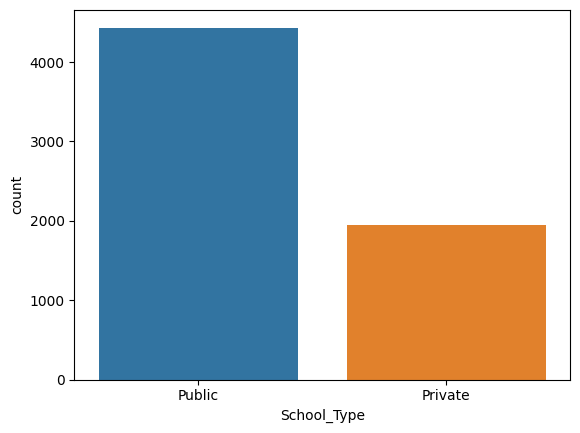

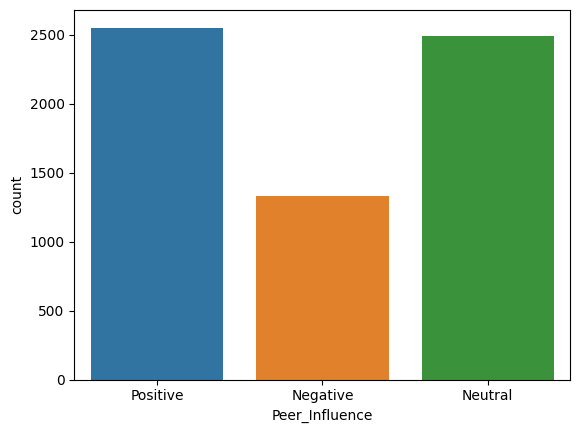

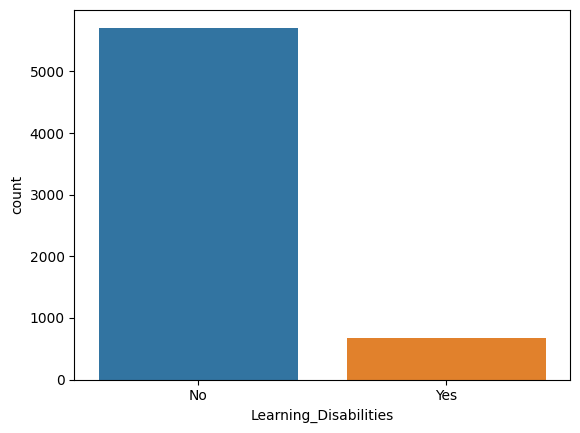

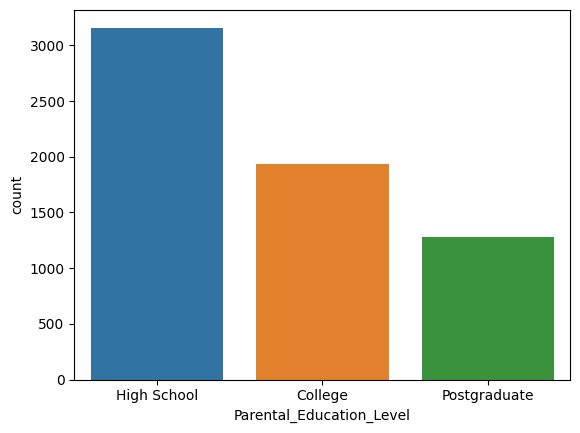

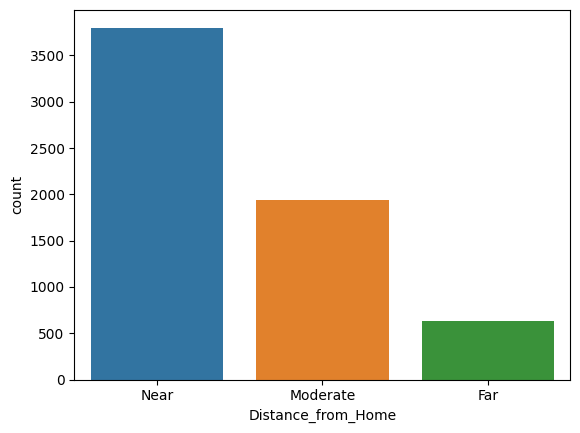

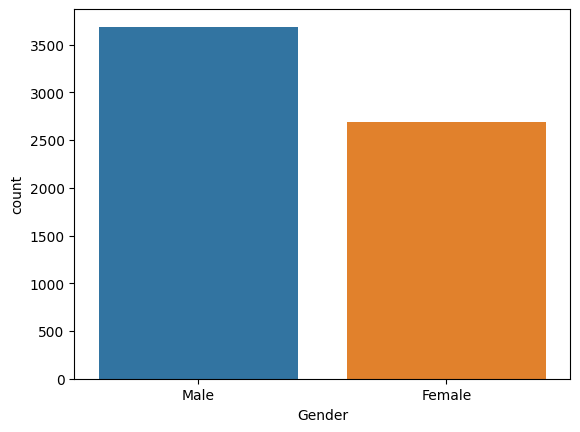

In [67]:
for col in df_cleaned.select_dtypes(include=["object"]).columns:
    sns.countplot(data=df_cleaned,x=col)
    plt.show()

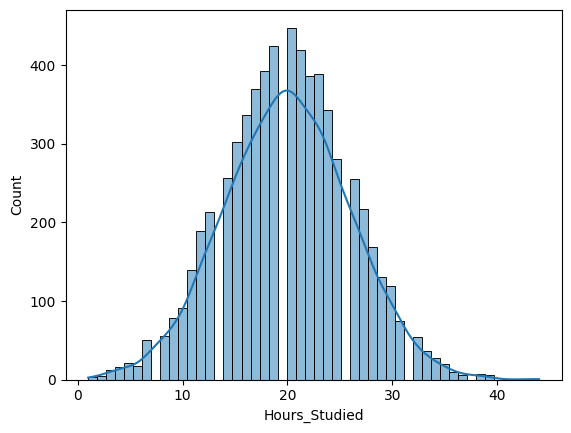

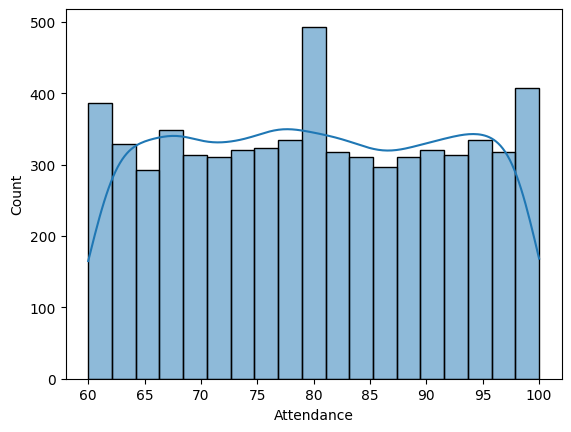

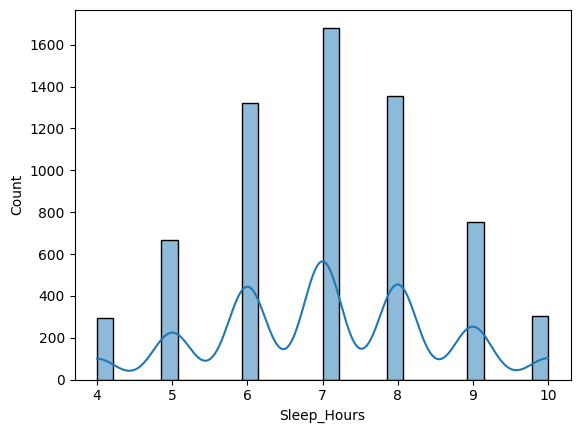

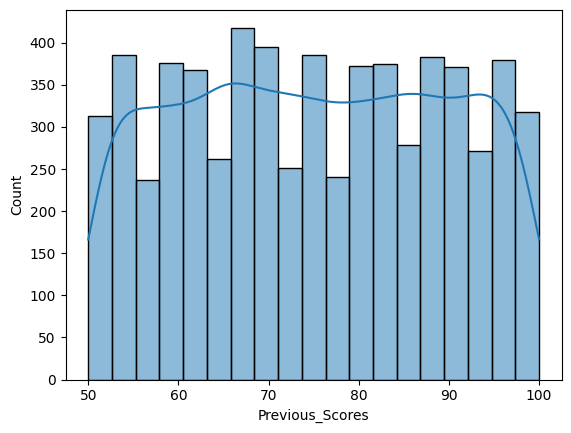

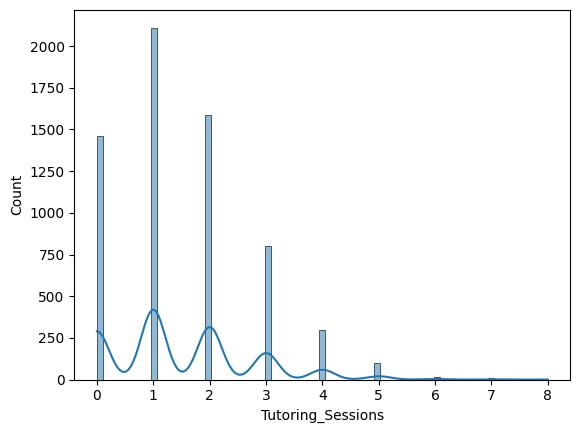

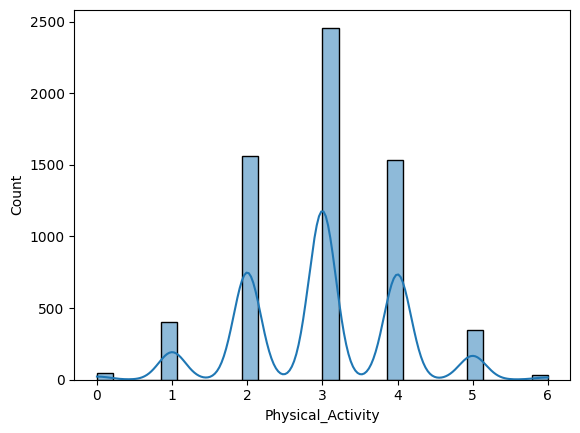

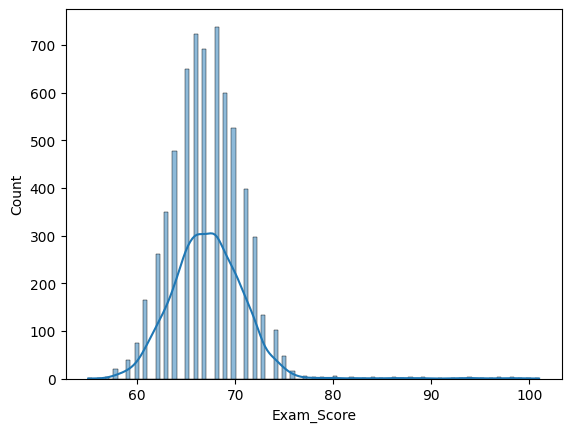

In [69]:
for col in df_cleaned.select_dtypes(include=[np.number]).columns:
    sns.histplot(df_cleaned[col],kde=True)
    plt.show()

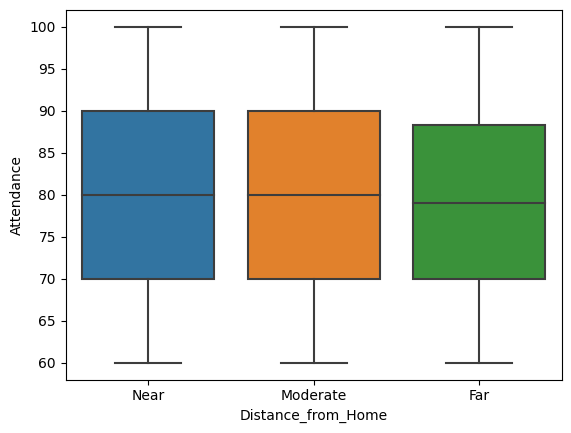

In [76]:
sns.boxplot(x='Distance_from_Home',y='Attendance',data=df_cleaned)
plt.show()

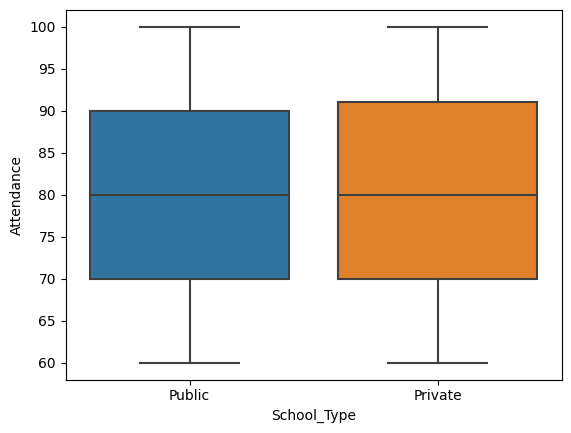

In [77]:
sns.boxplot(x='School_Type',y='Attendance',data=df_cleaned)
plt.show()

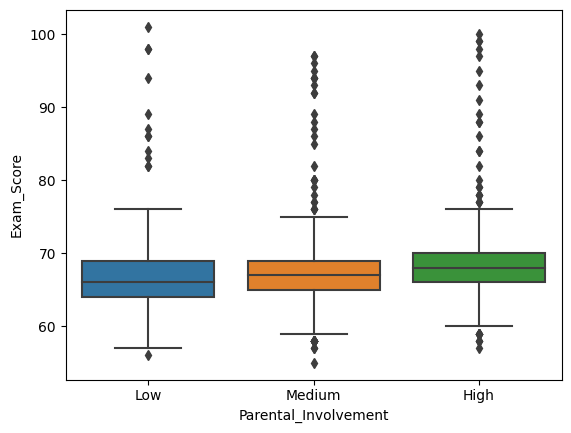

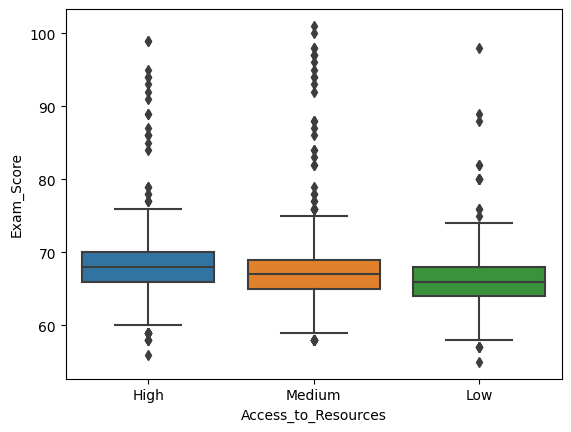

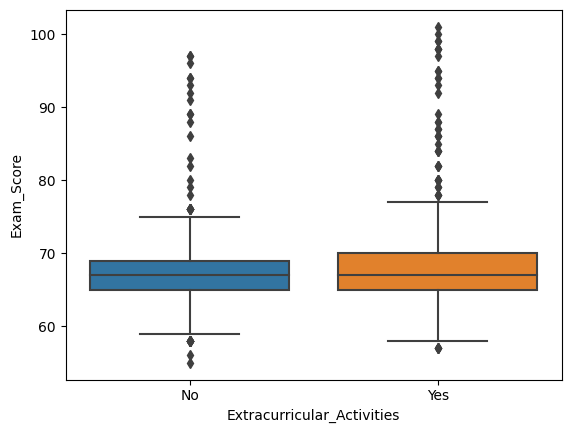

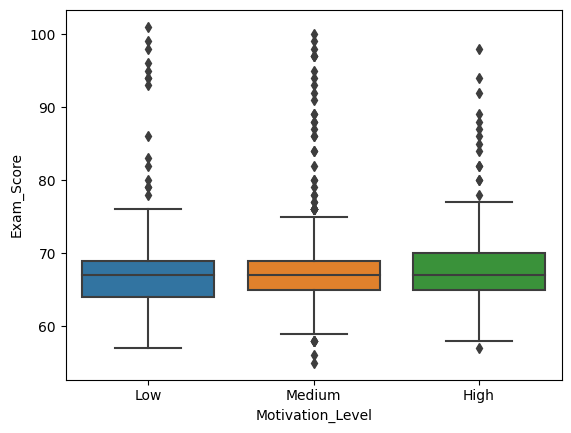

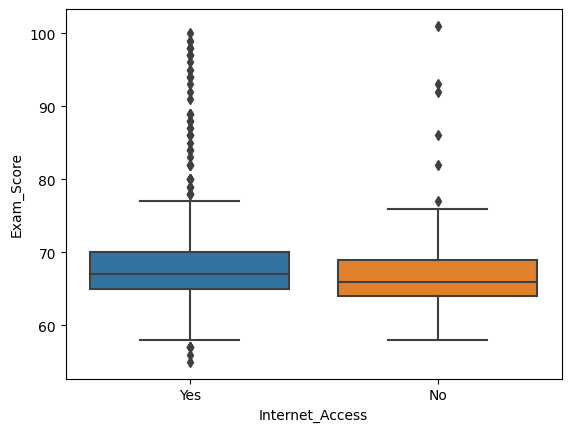

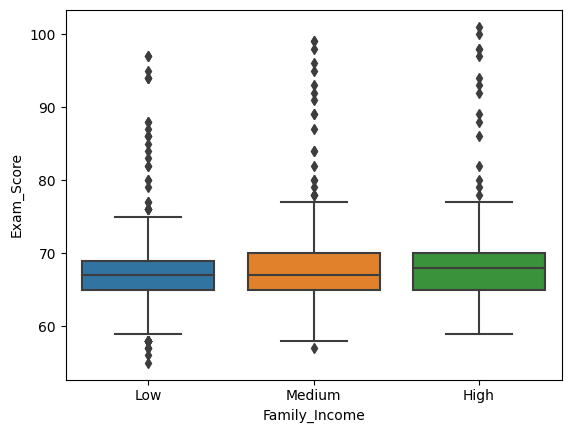

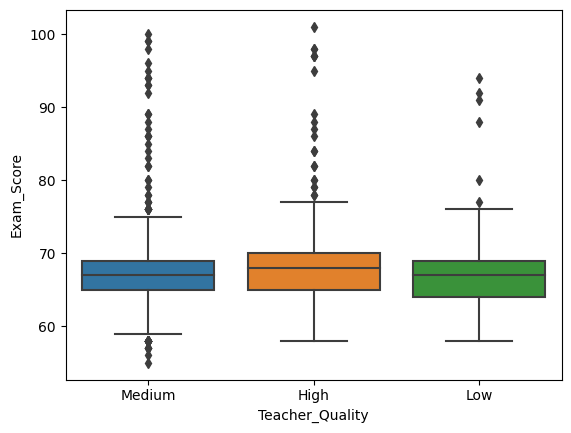

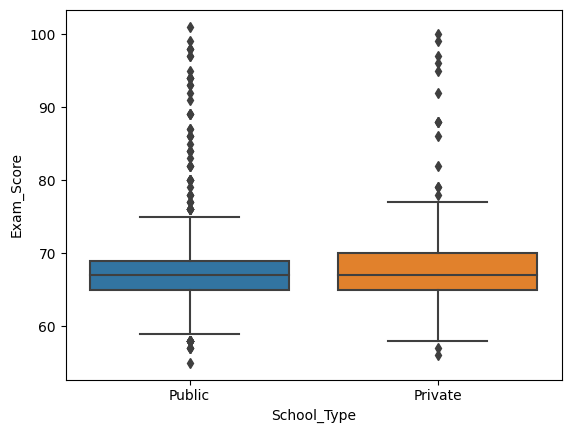

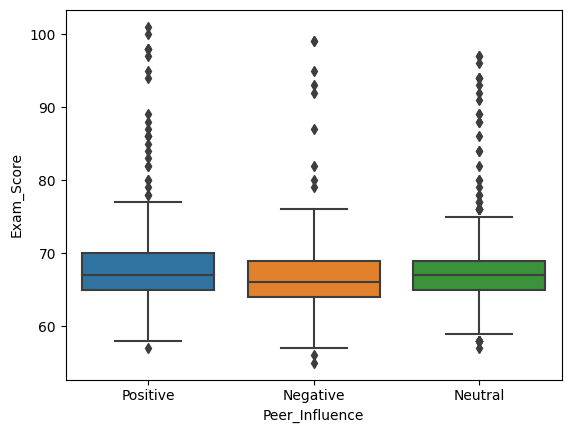

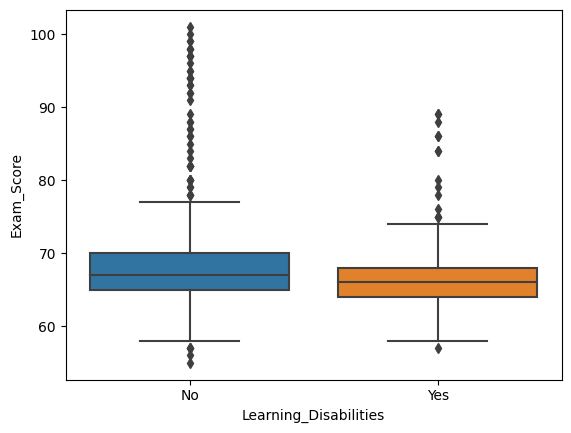

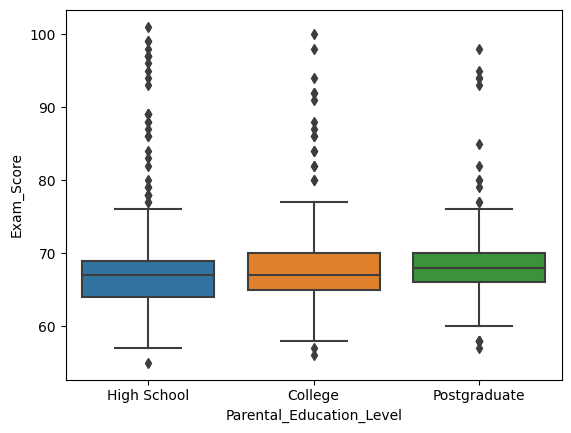

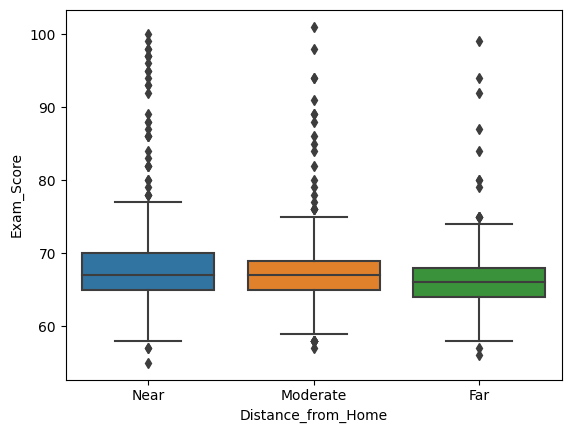

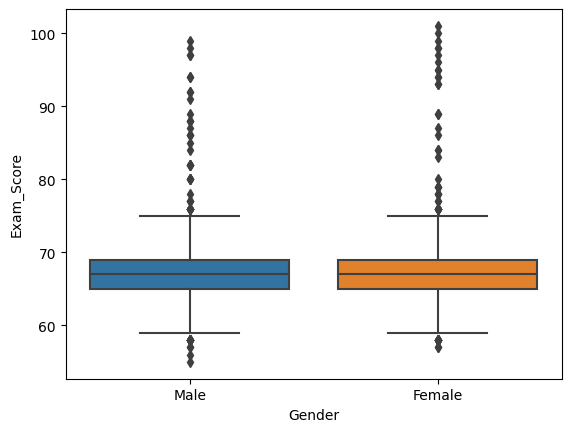

In [79]:
for col in df_cleaned.select_dtypes(include=["object"]).columns:
    sns.boxplot(x=col,y='Exam_Score',data=df_cleaned)
    plt.show()

C:\Users\hp compac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


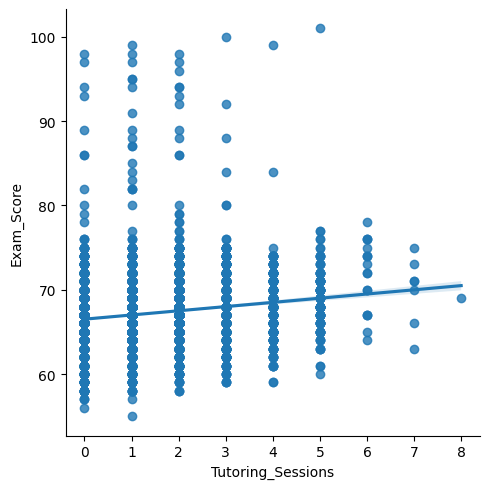

In [86]:
sns.lmplot(x='Tutoring_Sessions', y='Exam_Score', data=df_cleaned)
plt.show()


C:\Users\hp compac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


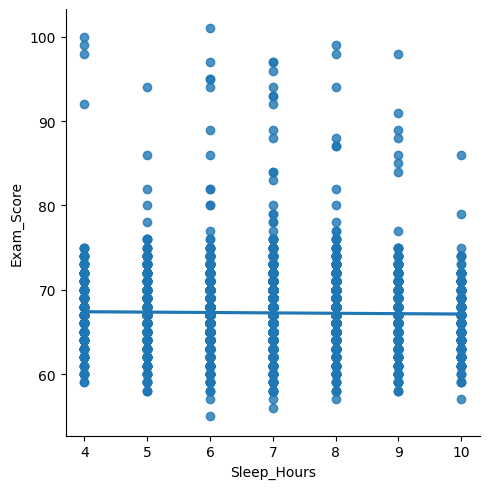

In [87]:
sns.lmplot(x='Sleep_Hours', y='Exam_Score', data=df_cleaned)
plt.show()

C:\Users\hp compac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


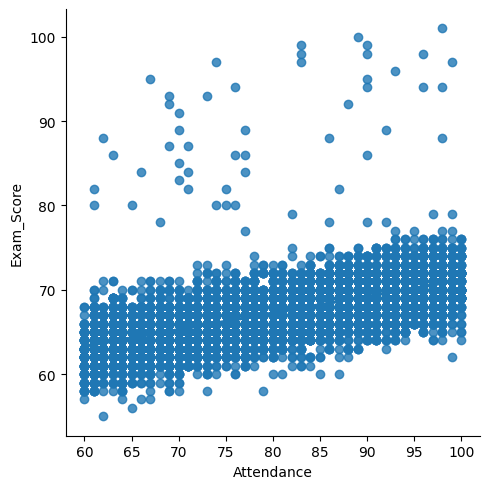

In [88]:
sns.lmplot(x='Attendance', y='Exam_Score', data=df_cleaned)
plt.show()

C:\Users\hp compac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


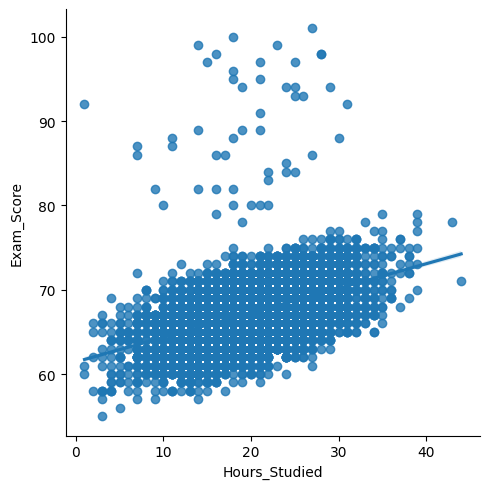

In [94]:
sns.lmplot(x='Hours_Studied', y='Exam_Score', data=df_cleaned)
plt.show()

C:\Users\hp compac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


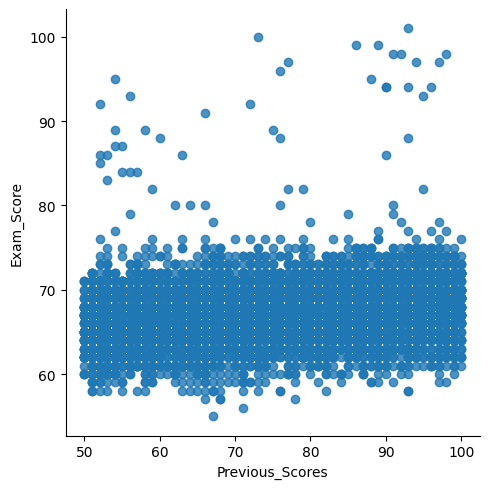

In [95]:
sns.lmplot(x='Previous_Scores', y='Exam_Score', data=df_cleaned)
plt.show()


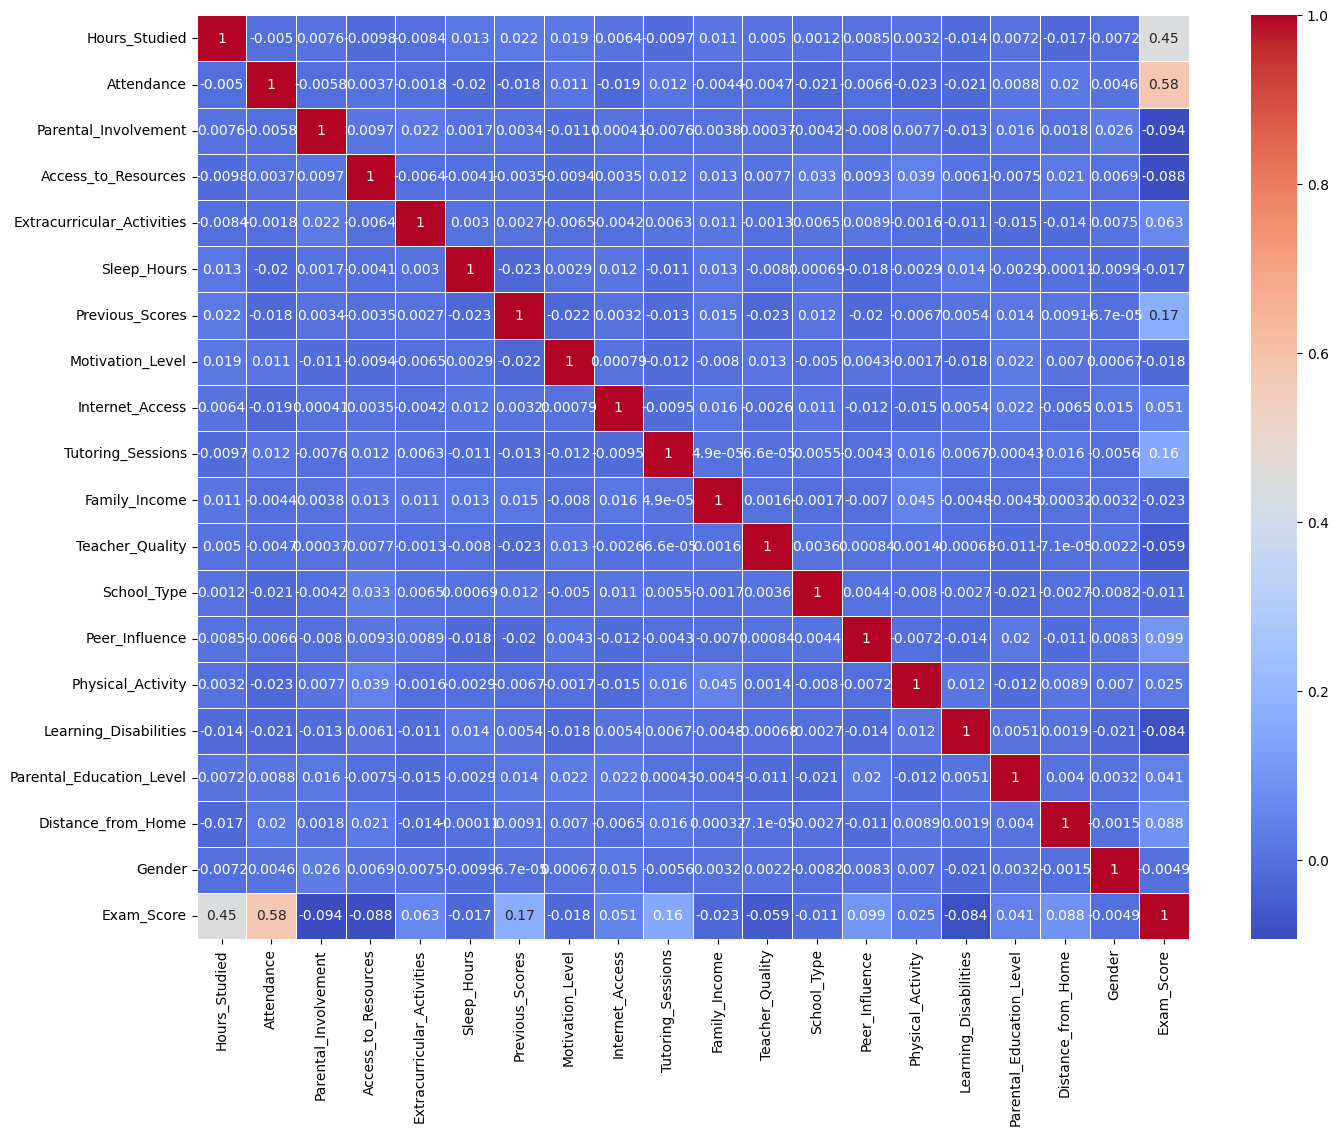

In [97]:
label_encoders = {}
for column in df_cleaned.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df_cleaned[column] = le.fit_transform(df_cleaned[column])
    label_encoders[column] = le


plt.figure(figsize=(16, 12))
correlation_matrix = df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [ ]:
# Prapering for Machine Learning

In [102]:
df_cleaned

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,0,2,0,7,76,2,1,1,0,2,1,2,2,0,1,2,0,68
6603,23,76,0,2,0,8,81,2,1,3,1,0,1,2,2,0,1,2,0,69
6604,20,90,2,1,1,6,65,1,1,3,1,2,1,0,2,0,2,2,0,68
6605,10,86,0,0,1,6,91,0,1,2,1,2,0,2,3,0,1,0,0,68


In [104]:
target_corr = correlation_matrix["Exam_Score"].abs().sort_values(ascending=False)
print(target_corr)

Exam_Score                    1.000000
Attendance                    0.580259
Hours_Studied                 0.445104
Previous_Scores               0.174283
Tutoring_Sessions             0.156829
Peer_Influence                0.099133
Parental_Involvement          0.094038
Access_to_Resources           0.088490
Distance_from_Home            0.088083
Learning_Disabilities         0.083911
Extracurricular_Activities    0.063063
Teacher_Quality               0.059247
Internet_Access               0.051124
Parental_Education_Level      0.040816
Physical_Activity             0.025148
Family_Income                 0.022651
Motivation_Level              0.017757
Sleep_Hours                   0.017171
School_Type                   0.010868
Gender                        0.004932
Name: Exam_Score, dtype: float64


In [178]:
corr_feature=target_corr[1:7].index.tolist()
corr_feature

['Attendance',
 'Hours_Studied',
 'Previous_Scores',
 'Tutoring_Sessions',
 'Peer_Influence',
 'Parental_Involvement']

In [179]:
df_final_feature=df_cleaned[corr_feature]
df_final_target=df_cleaned["Exam_Score"]
df_final_feature

,Attendance,Hours_Studied,Previous_Scores,Tutoring_Sessions,Peer_Influence,Parental_Involvement
0,84,23,73,0,2,1
1,64,19,59,2,0,1
2,98,24,91,2,1,2
3,89,29,98,1,0,1
4,92,19,65,3,1,2
...,...,...,...,...,...,...
6602,69,25,76,1,2,0
6603,76,23,81,3,2,0
6604,90,20,65,3,0,2
6605,86,10,91,2,2,0


In [181]:
scaler = StandardScaler()


In [182]:
scaled_data = scaler.fit_transform(df_final_feature)
scaled_df = pd.DataFrame(scaled_data, columns=df_final_feature.columns)
scaled_df

,Attendance,Hours_Studied,Previous_Scores,Tutoring_Sessions,Peer_Influence,Parental_Involvement
0,0.344520,0.505079,-0.143491,-1.211858,1.068637,-0.256457
1,-1.387109,-0.163260,-1.115763,0.409036,-1.575695,-0.256457
2,1.556661,0.672163,1.106573,0.409036,-0.253529,0.899504
3,0.777428,1.507587,1.592709,-0.401411,-1.575695,-0.256457
4,1.037172,-0.163260,-0.699075,1.219483,-0.253529,0.899504
...,...,...,...,...,...,...
6373,-0.954201,0.839248,0.064853,-0.401411,1.068637,-1.412418
6374,-0.348131,0.505079,0.412093,1.219483,1.068637,-1.412418
6375,0.864009,0.003825,-0.699075,1.219483,-1.575695,0.899504
6376,0.517683,-1.667022,1.106573,0.409036,1.068637,-1.412418


In [172]:
df_final_target

0       67
1       61
2       74
3       71
4       70
        ..
6602    68
6603    69
6604    68
6605    68
6606    64
Name: Exam_Score, Length: 6378, dtype: int64

In [183]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df,df_final_target ,test_size=0.2, random_state=42,  shuffle=True  )
print(X_train.shape)
print(X_test.shape)

(5102, 6)
(1276, 6)


In [184]:
model = LinearRegression()

In [185]:
model.fit(X_train, y_train)


LinearRegression()

In [186]:
y_pred = model.predict(X_test)

In [187]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 5.664642987642456
R² Score: 0.635464024828043


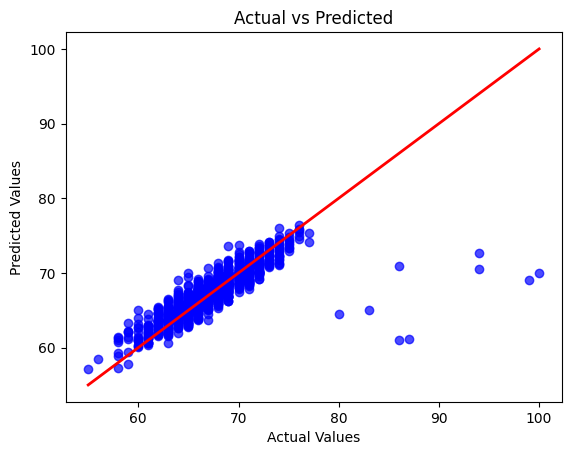

In [193]:
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Perfect line
plt.show()